In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

instance = 'pr01'
m = 1

# Load the CSV files
csv_a = pd.read_csv('./build/output/aws/release_benchmarks.csv', delimiter=',')
csv_b = pd.read_csv('./build/output/aws/release-no-history_benchmarks.csv', delimiter=',')
csv_c = pd.read_csv('./build/output/aws/release-equal-intervals_benchmarks.csv', delimiter=',')
csv_d = pd.read_csv('./build/output/aws/release-simple_benchmarks.csv', delimiter=',')

# Filter data for m=1
csv_a = csv_a.loc[csv_a['m'] == m]
csv_b = csv_b.loc[csv_b['m'] == m]
csv_c = csv_c.loc[csv_c['m'] == m]
csv_d = csv_d.loc[csv_d['m'] == m]

# Select data for the hardcoded instance
pr01_a = csv_a.loc[csv_a['instance'] == instance]
pr01_b = csv_b.loc[csv_b['instance'] == instance]
pr01_c = csv_c.loc[csv_c['instance'] == instance]
pr01_d = csv_d.loc[csv_d['instance'] == instance]

print(pr01_a)
# Plot the first graph
fig, ax1 = plt.subplots()

ax1.set_xlabel('s')
ax1.set_ylabel('score')
ax1.set_xticks(np.arange(1, 5))

ax1.plot(pr01_a['s'], pr01_a['score'], label='csv_a')
ax1.plot(pr01_b['s'], pr01_b['score'], label='csv_b')
ax1.plot(pr01_c['s'], pr01_c['score'], label='csv_c')
ax1.plot(pr01_d['s'], pr01_d['score'], label='csv_d')

ax1.legend()

# Plot the second graph
fig, ax2 = plt.subplots()

ax2.set_xlabel('s')
ax2.set_ylabel('time')
ax2.set_xticks(np.arange(1, 5))

ax2.plot(pr01_a['s'], pr01_a['time'], label='csv_a')
ax2.plot(pr01_b['s'], pr01_b['time'], label='csv_b')
ax2.plot(pr01_c['s'], pr01_c['time'], label='csv_c')
ax2.plot(pr01_d['s'], pr01_d['time'], label='csv_d')

ax2.legend()

plt.show()

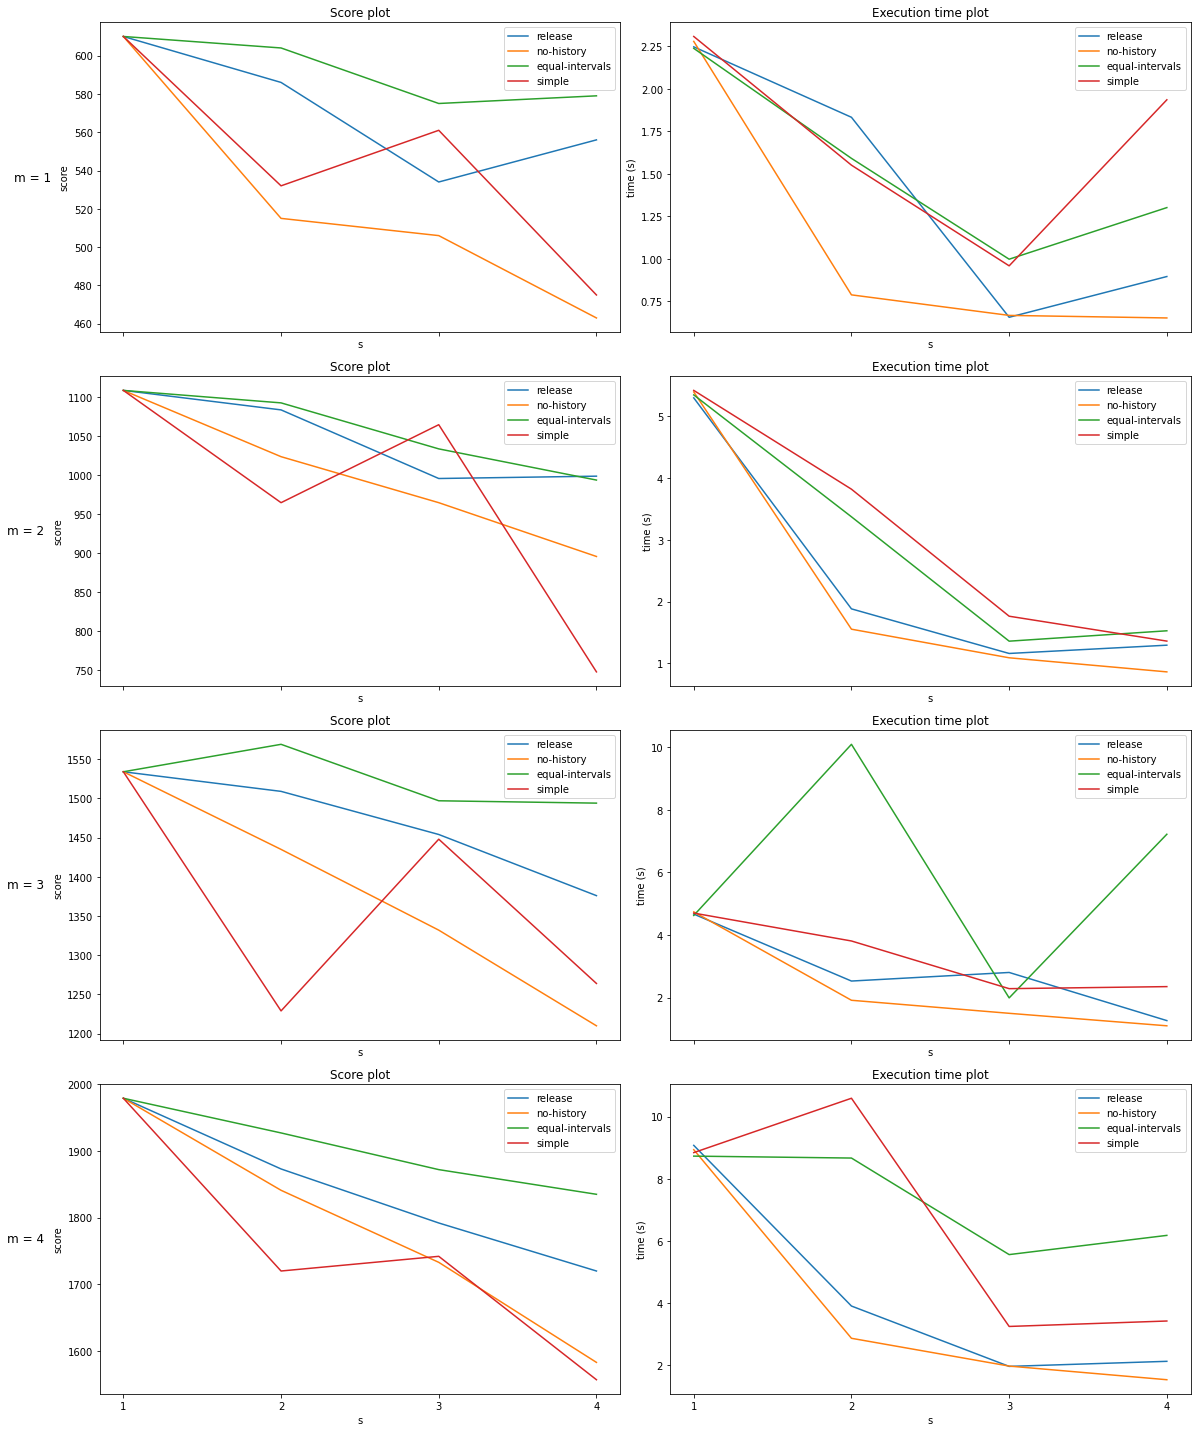

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

instances = ['pr01', 'pr02', 'pr03']

instance = 'pr20'
# caption = caption = 'Figure 1: Comparison of score and execution time across s values for '+instance+', m='+str(m)

# Create a figure with two subplots
fig, axs = plt.subplots(4, 2, figsize=(18, 20), sharex=True)

# Load the data from CSV files
# Load the CSV files
csv1 = pd.read_csv('./build/output/aws/release_benchmarks.csv', delimiter=',')
csv2 = pd.read_csv('./build/output/aws/release-no-history_benchmarks.csv', delimiter=',')
csv3 = pd.read_csv('./build/output/aws/release-equal-intervals_benchmarks.csv', delimiter=',')
csv4 = pd.read_csv('./build/output/aws/release-simple_benchmarks.csv', delimiter=',')

pad = 5

for m in range(0, 4):
    
    # Filter data for m=1
    df1 = csv1.loc[csv1['m'] == m+1]
    df2 = csv2.loc[csv2['m'] == m+1]
    df3 = csv3.loc[csv3['m'] == m+1]
    df4 = csv4.loc[csv4['m'] == m+1]

    # Select data for the hardcoded instance
    df1 = df1.loc[df1['instance'] == instance]
    df2 = df2.loc[df2['instance'] == instance]
    df3 = df3.loc[df3['instance'] == instance]
    df4 = df4.loc[df4['instance'] == instance]
    
    # Plot the score data in the first subplot
    axs[m, 0].plot(df1['s'], df1['score'], label='release')
    axs[m, 0].plot(df2['s'], df2['score'], label='no-history')
    axs[m, 0].plot(df3['s'], df3['score'], label='equal-intervals')
    axs[m, 0].plot(df4['s'], df4['score'], label='simple')
    axs[m, 0].set_xlabel('s')
    axs[m, 0].set_ylabel('score')
    axs[m, 0].set_title('Score plot')
    axs[m, 0].legend()
#     axs[m, 0].label_outer()

    # Plot the execution time data in the second subplot
    axs[m, 1].plot(df1['s'], df1['time'], label='release')
    axs[m, 1].plot(df2['s'], df2['time'], label='no-history')
    axs[m, 1].plot(df3['s'], df3['time'], label='equal-intervals')
    axs[m, 1].plot(df4['s'], df4['time'], label='simple')
    axs[m, 1].set_xlabel('s')
    axs[m, 1].set_ylabel('time (s)')
    axs[m, 1].set_title('Execution time plot')
    axs[m, 1].legend()
#     axs[m, 1].label_outer()

    axs[m, 0].set_xticks(df1['s'].unique())
    axs[m, 1].set_xticks(df1['s'].unique())
    
    axs[m, 0].set_xticks(df2['s'].unique())
    axs[m, 1].set_xticks(df2['s'].unique())
    
    axs[m, 0].set_xticks(df3['s'].unique())
    axs[m, 1].set_xticks(df3['s'].unique())
    
    axs[m, 0].set_xticks(df4['s'].unique())
    axs[m, 1].set_xticks(df4['s'].unique())


rows = ['m = {}'.format(row) for row in range(1, 5)]

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

# Adjust the spacing between subplots
fig.tight_layout()

fig.subplots_adjust(left=0.15)

# Show the plot
plt.show()

# Save the figure
# fig.savefig('plot_m'+str(m)+'.png')

   


[[array([242., 281., 274., 229.]), array([242., 271., 267., 229.]), array([242., 258., 291., 249.]), array([242., 234., 291., 241.])], [array([375., 328., 322., 295.]), array([375., 344., 321., 288.]), array([375., 353., 321., 333.]), array([375., 359., 317., 311.])], [array([376., 366., 350., 309.]), array([376., 360., 326., 265.]), array([376., 343., 373., 358.]), array([376., 346., 374., 342.])], [array([478., 447., 411., 433.]), array([478., 446., 433., 416.]), array([478., 443., 440., 414.]), array([478., 443., 448., 411.])], [array([524., 511., 486., 504.]), array([524., 507., 469., 484.]), array([524., 466., 522., 485.]), array([524., 558., 514., 492.])], [array([574., 543., 518., 460.]), array([574., 525., 512., 486.]), array([574., 509., 542., 502.]), array([574., 485., 540., 450.])], [array([261., 251., 229., 251.]), array([261., 251., 237., 226.]), array([261., 273., 252., 271.]), array([261., 273., 257., 264.])], [array([447., 389., 417., 355.]), array([447., 389., 386., 33

[[array([649., 605., 610., 583.]), array([649., 602., 552., 527.]), array([649., 608., 610., 597.]), array([649., 624., 543., 587.])], [array([1001.,  969.,  947.,  947.]), array([1001.,  955.,  942.,  877.]), array([1001.,  982., 1008.,  918.]), array([1001.,  995.,  979.,  914.])], [array([1118., 1062., 1028., 1030.]), array([1118., 1054.,  902.,  971.]), array([1118., 1134., 1101., 1020.]), array([1118., 1077., 1112., 1041.])], [array([1483., 1435., 1366., 1374.]), array([1483., 1396., 1363., 1349.]), array([1483., 1418., 1387., 1354.]), array([1483., 1412., 1401., 1341.])], [array([1640., 1627., 1532., 1545.]), array([1640., 1628., 1575., 1500.]), array([1640., 1669., 1662., 1563.]), array([1640., 1628., 1663., 1585.])], [array([1695., 1694., 1683., 1588.]), array([1695., 1657., 1648., 1523.]), array([1695., 1686., 1674., 1633.]), array([1695., 1711., 1707., 1623.])], [array([821., 786., 760., 712.]), array([821., 782., 755., 702.]), array([821., 796., 801., 771.]), array([821., 78

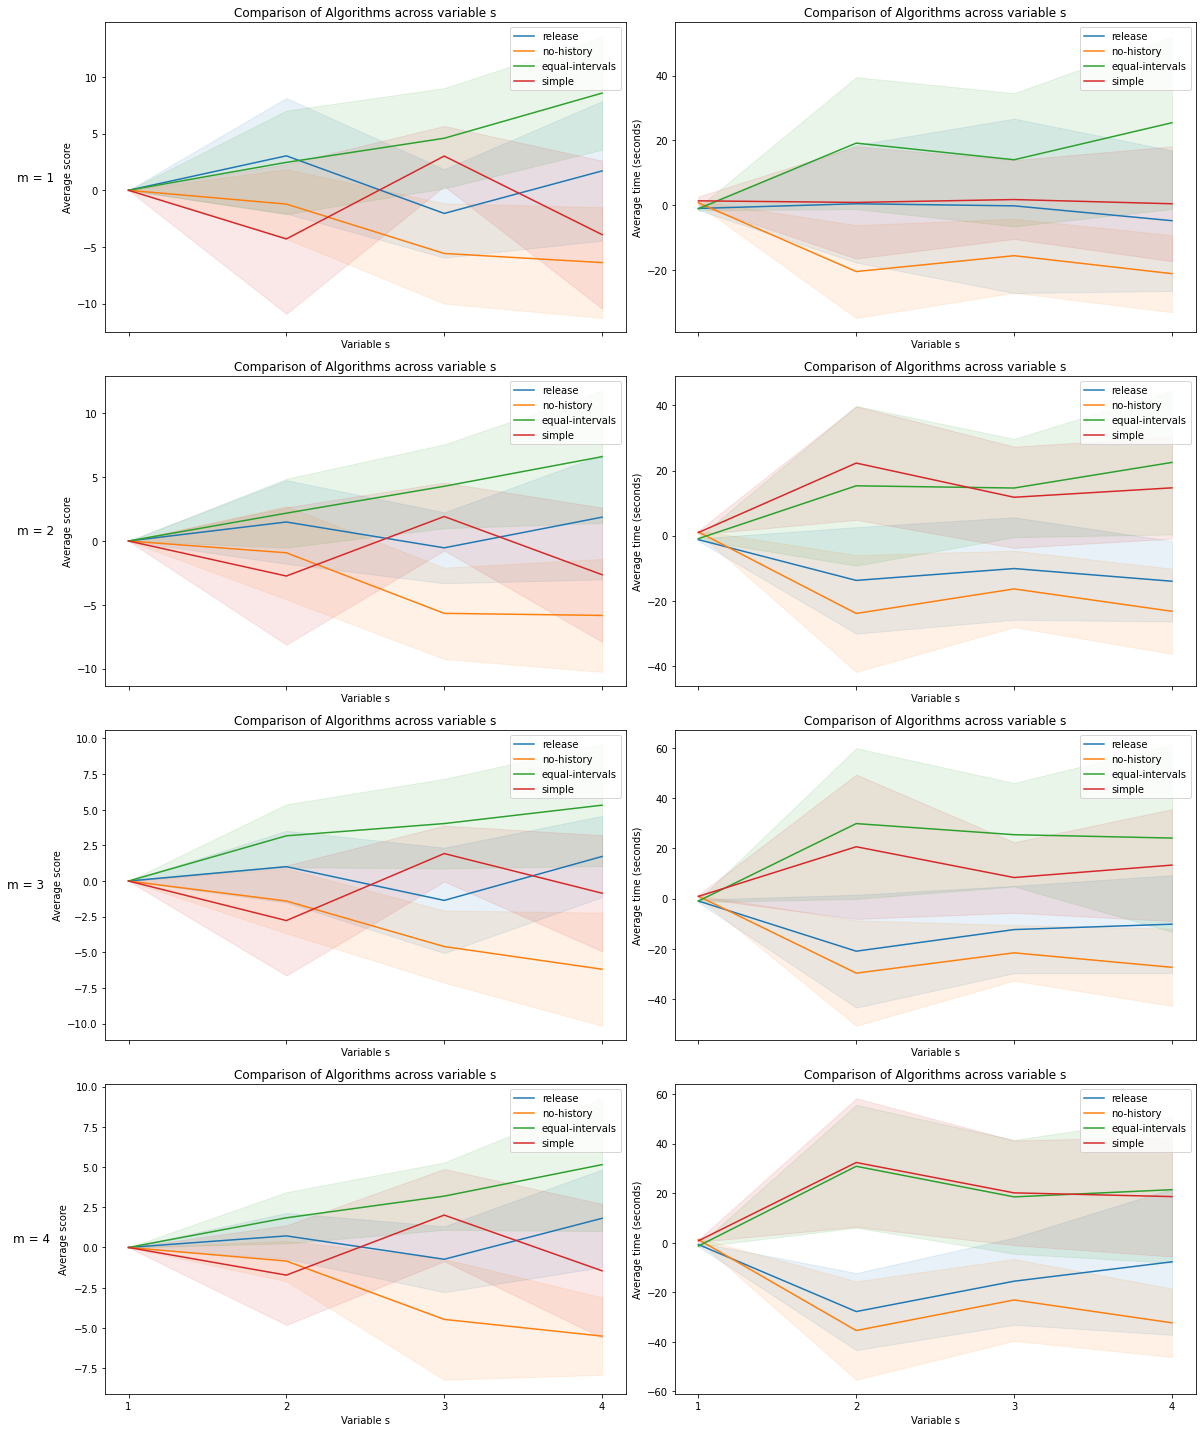

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

algorithms = ['release', 'no-history', 'equal-intervals', 'simple']
instances = ['pr01', 'pr02', 'pr03', 'pr04', 'pr05', 'pr06', 'pr07', 'pr08', 'pr09','pr10', 
             'pr11', 'pr12', 'pr13', 'pr14', 'pr15', 'pr16', 'pr17', 'pr18', 'pr19','pr20']

# instances = ['pr01', 'pr02', 'pr03']
# instances = ['pr01', 'pr02', 'pr03', 'pr04', 'pr05', 'pr06', 'pr07', 'pr08', 'pr09','pr10']
# caption = caption = 'Figure 1: Comparison of score and execution time across s values for '+instance+', m='+str(m)

# Create a figure with two subplots
fig, axs = plt.subplots(4, 2, figsize=(18, 20), sharex=True)

# Load the data from CSV files
# Load the CSV files
csv1 = pd.read_csv('./build/output/aws/release_benchmarks.csv', delimiter=',')
csv2 = pd.read_csv('./build/output/aws/release-no-history_benchmarks.csv', delimiter=',')
csv3 = pd.read_csv('./build/output/aws/release-equal-intervals_benchmarks.csv', delimiter=',')
csv4 = pd.read_csv('./build/output/aws/release-simple_benchmarks.csv', delimiter=',')

# instances = csv1['instance'].unique()
# instances = instances[instances != 'c101']  # create a new array without the element 3

pad = 5

for m in range(0, 4):
    
    m_scores = []

    m_times = []
    
    for i in instances:

        # Filter data for m=1 and instance
        df1 = csv1.loc[(csv1['m'] == m+1) & (csv1['instance'] == i)]
        df2 = csv2.loc[(csv2['m'] == m+1) & (csv2['instance'] == i)]
        df3 = csv3.loc[(csv3['m'] == m+1) & (csv3['instance'] == i)]
        df4 = csv4.loc[(csv4['m'] == m+1) & (csv4['instance'] == i)]

        instance_scores = []
        for df in [df1, df2, df3, df4]:
            # Get the score values and pad the list with np.nan to ensure all lists have the same length
            instance_scores.append(np.pad(df['score'].tolist(), (0, 4 - len(df['score'])), constant_values=-9999).astype(np.float64))
        
        m_scores.append(instance_scores)
        
        instance_times = []
        for df in [df1, df2, df3, df4]:
            # Get the score values and pad the list with np.nan to ensure all lists have the same length
            instance_times.append(np.pad(df['time'].tolist(), (0, 4 - len(df['time'])), constant_values=-9999).astype(np.float64))
        m_times.append(instance_times)
        
    temp_mean_scores = np.mean(m_scores,axis=1)
    print(m_scores)
    print(temp_mean_scores)
    m_scores = np.array(m_scores)
    for i in range(4):
        m_scores[:,i,:] = (m_scores[:,i,:]-temp_mean_scores)/temp_mean_scores*100
        
    temp_mean_times = np.mean(m_times, axis=1)
    m_times = np.array(m_times)
    for i in range(4):
        m_times[:,i,:] = (m_times[:,i,:]-temp_mean_times)/temp_mean_times*100
    
    mean_scores = np.mean(m_scores, axis=0)
    mean_times = np.mean(m_times, axis=0)
    
    std_scores = np.std(m_scores, axis=0)
    std_times = np.std(m_times, axis=0)    

    # Plot mean scores for each algorithm using separate lines in the score plot
    cc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    for i in range(4):
        axs[m, 0].plot(range(1, 5), mean_scores[i], label=algorithms[i], color=cc[i])
        axs[m, 0].fill_between(range(1, 5),mean_scores[i]-std_scores[i], mean_scores[i]+std_scores[i],alpha=0.10, color=cc[i])
        
    
    # Set axis labels, title, and legend for the score plot
    axs[m, 0].set_xlabel('Variable s')
    axs[m, 0].set_ylabel('Average score')
    axs[m, 0].set_title('Comparison of Algorithms across variable s')
    axs[m, 0].legend()

    # Plot mean times for each algorithm using separate lines in the time plot
    for i in range(4):
        axs[m, 1].plot(range(1, 5), mean_times[i], label=algorithms[i], color=cc[i])
        axs[m, 1].fill_between(range(1, 5),mean_times[i]-std_times[i], mean_times[i]+std_times[i],alpha=0.10, color=cc[i])
    # Set axis labels, title, and legend for the time plot
    axs[m, 1].set_xlabel('Variable s')
    axs[m, 1].set_ylabel('Average time (seconds)')
    axs[m, 1].set_title('Comparison of Algorithms across variable s')
    axs[m, 1].legend()
    
    axs[m, 0].set_xticks(df1['s'].unique())
    axs[m, 1].set_xticks(df1['s'].unique())
    
rows = ['m = {}'.format(row) for row in range(1, 5)]

for ax, row in zip(axs[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

# Adjust the spacing between subplots
fig.tight_layout()

fig.subplots_adjust(left=0.15)

# display the plot
plt.show()


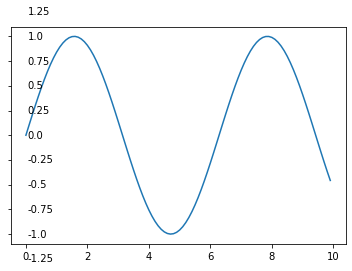

In [38]:
# create an example plot
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

# show the exact values of y above the y-axis
yticks = ax.get_yticks()
yvals = [np.round(ytick, 2) for ytick in yticks]
ax.set_yticklabels([])
for ytick, yval in zip(yticks, yvals):
    ax.text(0.05, ytick, yval, va='center')
    
plt.show()


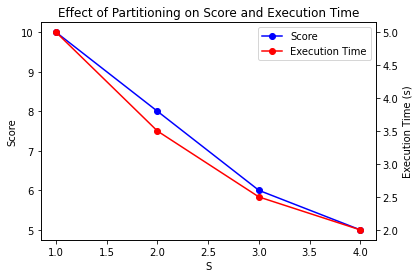

In [9]:
import matplotlib.pyplot as plt


# Data for the plot
S = [1, 2, 3, 4]  # Different values of S
score = [10, 8, 6, 5]  # Solution score for each value of S
execution_time = [5, 3.5, 2.5, 2]  # Execution time for each value of S

# Create a figure with two y-axes that share the same x-axis
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

# Plot the score and execution time on separate y-axes
ax1.plot(S, score, 'bo-', label='Score')
ax2.plot(S, execution_time, 'ro-', label='Execution Time')

# Set labels for each axis
ax1.set_xlabel('S')
ax1.set_ylabel('Score')
ax2.set_ylabel('Execution Time (s)')

# Add a legend for each line
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='best')

# Set the title of the plot
plt.title('Effect of Partitioning on Score and Execution Time')

# Show the plot
plt.show()


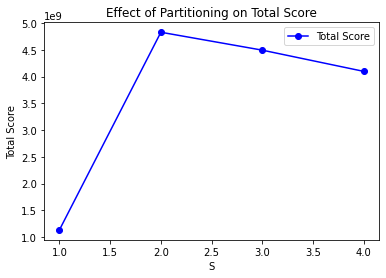

In [13]:
import matplotlib.pyplot as plt
import math

# Data for the plot
score = [1784, 1690, 1650, 1600]  # Solution score for each value of S
execution_time = [5, 1, 1, 1]  # Execution time for each value of S

# Compute the total score based on the given formula
total_score = [s**2/t for s, t in zip(score, execution_time)]

# Create a figure with a single y-axis
fig, ax = plt.subplots()

# Plot the total score as a line
ax.plot(S, total_score, 'bo-', label='Total Score')

# Set labels for the axis
ax.set_xlabel('S')
ax.set_ylabel('Total Score')

# Add a legend for the line
ax.legend(loc='best')

# Set the title of the plot
plt.title('Effect of Partitioning on Total Score')

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


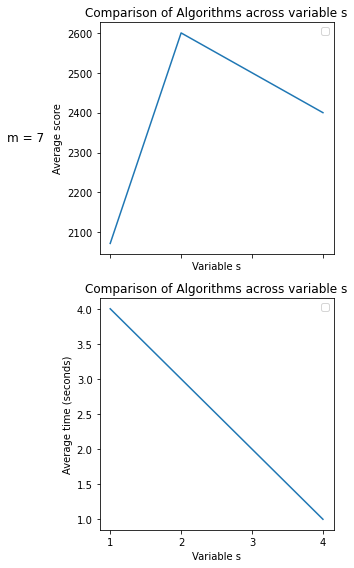

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

algorithms = ['release', 'no-history', 'equal-intervals', 'simple']
instances = ['pr01', 'pr02', 'pr03', 'pr04', 'pr05', 'pr06', 'pr07', 'pr08', 'pr09','pr10', 
             'pr11', 'pr12', 'pr13', 'pr14', 'pr15', 'pr16', 'pr17', 'pr18', 'pr19','pr20']

# instances = ['pr01', 'pr02', 'pr03']
# instances = ['pr01', 'pr02', 'pr03', 'pr04', 'pr05', 'pr06', 'pr07', 'pr08', 'pr09','pr10']
# caption = caption = 'Figure 1: Comparison of score and execution time across s values for '+instance+', m='+str(m)

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(4, 8), sharex=True)


# instances = csv1['instance'].unique()
# instances = instances[instances != 'c101']  # create a new array without the element 3

pad = 5

    
scores = [2072, 2600, 2500, 2400]

times = [4, 3, 2, 1]   
    
     
cc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        
    
axs[0].plot(range(1, 5), scores)
axs[0].set_xlabel('Variable s')
axs[0].set_ylabel('Average score')
axs[0].set_title('Comparison of Algorithms across variable s')
axs[0].legend()

axs[1].plot(range(1, 5), times)
axs[1].set_xlabel('Variable s')
axs[1].set_ylabel('Average time (seconds)')
axs[1].set_title('Comparison of Algorithms across variable s')
axs[1].legend()

axs[0].set_xticks(range(1,5))
axs[1].set_xticks(range(1,5))
    
axs[0].annotate('m = 7', xy=(0, 0.5), xytext=(-axs[0].yaxis.labelpad - pad, 0),
            xycoords=axs[0].yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center')
# for ax, row in zip(axs[:], rows):
#     ax.annotate('m = 7', xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 size='large', ha='right', va='center')

# Adjust the spacing between subplots
fig.tight_layout()

fig.subplots_adjust(left=0.15)

# display the plot
plt.show()